In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
!git init; git pull https://github.com/singhk100/LogisticRegression_Vectorized_Implementation.git;

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10
Unpacking objects: 100% (10/10), done.
From https://github.com/singhk100/LogisticRegression_Vectorized_Implementation
 * branch            HEAD       -> FETCH_HEAD


In [4]:
df = pd.read_csv('iris-data.csv')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
#Removing all null values row
df = df.dropna(subset=['petal_width_cm'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  145 non-null    float64
 1   sepal_width_cm   145 non-null    float64
 2   petal_length_cm  145 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [11]:
#Plot
import warnings
warnings.filterwarnings("ignore")

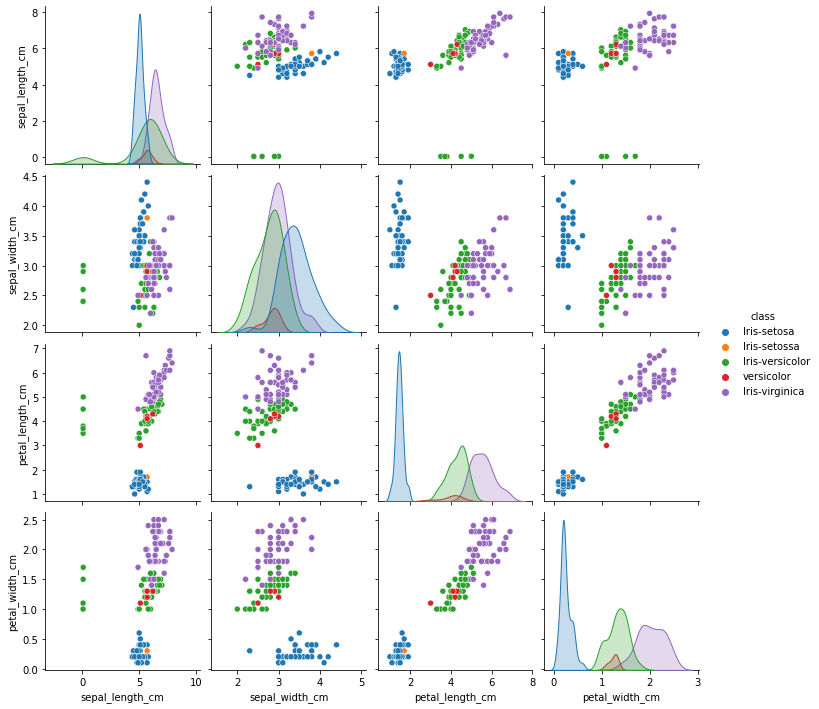

In [13]:
sns.pairplot(df, hue='class', size=2.5);

From the plots it can be observed that there is some abnormality in the class name. Let's explore further

In [14]:
df['class'].value_counts()

Iris-virginica     50
Iris-versicolor    45
Iris-setosa        44
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

Two observations can be made from the above results
- For 5 data points 'Iris-versicolor' has been specified as 'versicolor' 
- For 1 data points, 'Iris-setosa' has been specified as 'Iris-setossa'

In [15]:
df['class'].replace(["Iris-setossa","versicolor"], ["Iris-setosa","Iris-versicolor"], inplace=True)
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        45
Name: class, dtype: int64

# Simple Logistic Regression

Consider only two class 'Iris-setosa' and 'Iris-versicolor'. Dropping all other class

In [16]:
final_df = df[df['class'] != 'Iris-virginica']

In [17]:
final_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Outlier Check

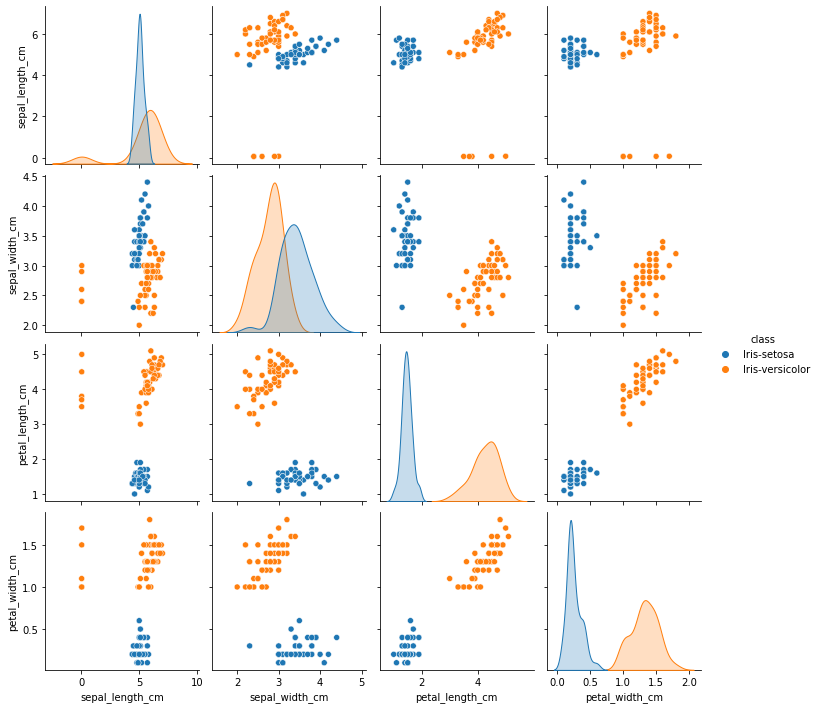

In [18]:
sns.pairplot(final_df, hue='class', size=2.5)

From the above plot, sepal_width and sepal_length seems to have outliers. To confirm let's plot them seperately

SEPAL LENGTH

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a689fd358>]],
      dtype=object)

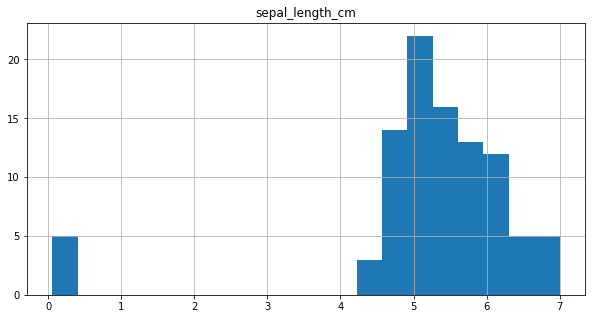

In [19]:
final_df.hist(column = 'sepal_length_cm',bins=20, figsize=(10,5))

It can be observed from the plot, that for 5 data points values are below 1 and they seem to be outliers. So, these data points
are considered to be in 'm' and are converted to 'cm'.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a68872e10>]],
      dtype=object)

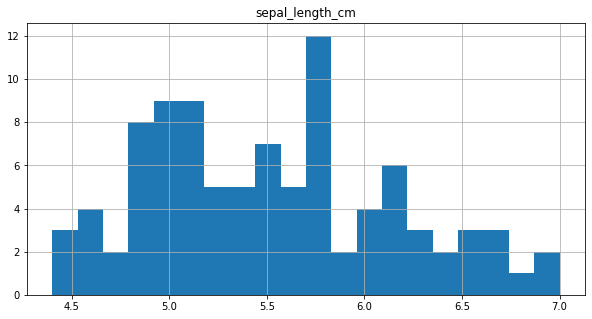

In [20]:
final_df.loc[final_df.sepal_length_cm < 1, ['sepal_length_cm']] = final_df['sepal_length_cm']*100
final_df.hist(column = 'sepal_length_cm',bins=20, figsize=(10,5))

SEPAL WIDTH

In [21]:
final_df = final_df.drop(final_df[(final_df['class'] == "Iris-setosa") & (final_df['sepal_width_cm'] < 2.5)].index)

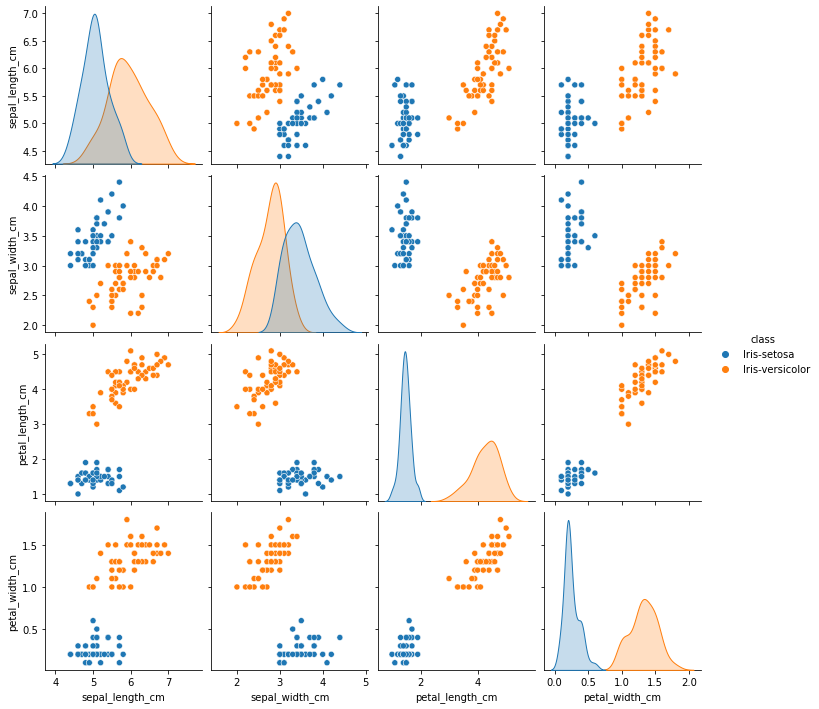

In [22]:
sns.pairplot(final_df, hue='class', size=2.5)

Successfully removed outliers!!

# Label Encoding

In [47]:
final_df['class'].replace(["Iris-setosa","Iris-versicolor"], [1,0], inplace=True)

In [48]:
final_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


# Model Construction

In [49]:
inp_df = final_df.drop(final_df.columns[[4]], axis=1)
out_df = final_df.drop(final_df.columns[[0,1,2,3]], axis=1)
#
scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)
#
X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.2, random_state=42)

In [50]:
print(inp_df)
print(out_df)

[[-0.68872595  0.85907917 -1.07619912 -1.11010489]
 [-1.01161991 -0.19514331 -1.07619912 -1.11010489]
 [-1.33451387  0.22654568 -1.1455837  -1.11010489]
 [-1.49596085  0.01570119 -1.00681454 -1.11010489]
 [-0.85017293  1.06992366 -1.07619912 -1.11010489]
 [-0.20438501  1.70245715 -0.86804538 -0.75335323]
 [-1.49596085  0.64823467 -1.07619912 -0.93172906]
 [-1.17306689 -0.19514331 -1.07619912 -1.28848072]
 [ 0.27995593 -0.19514331 -1.28435286 -1.28848072]
 [ 0.44140291  1.91330164 -1.21496828 -1.11010489]
 [ 0.27995593  2.75667963 -1.00681454 -0.75335323]
 [-0.20438501  1.70245715 -1.1455837  -0.75335323]
 [-0.68872595  0.85907917 -1.07619912 -0.93172906]
 [ 0.27995593  1.49161265 -0.86804538 -0.93172906]
 [-0.68872595  1.49161265 -1.00681454 -0.93172906]
 [-0.20438501  0.64823467 -0.86804538 -1.11010489]
 [-0.68872595  1.28076816 -1.00681454 -0.75335323]
 [-1.49596085  1.06992366 -1.35373744 -1.11010489]
 [-0.68872595  0.43739018 -0.86804538 -0.57497741]
 [-1.17306689  0.64823467 -0.72

In [51]:
X_tr_arr = X_train
X_ts_arr = X_test
y_tr_arr = y_train.to_numpy()
y_ts_arr = y_test.to_numpy()

In [52]:
print('Input Shape', (X_tr_arr.shape))
print('Output Shape', X_test.shape)

Input Shape (75, 4)
Output Shape (19, 4)


In [53]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

In [54]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

In [62]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T.astype(np.float)
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost
    

In [59]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate *dw.T)
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [60]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [63]:
#Get number of features
n_features = X_tr_arr.shape[1]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)
#Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.0001,no_iterations=4500)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)
#
m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]
#
y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))
#
y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_ts_arr))

Number of Features 4
Optimized weights [[-0.13397714  0.13130132 -0.18248682 -0.18319564]]
Optimized intercept -0.02413463192134359
Training Accuracy 1.0
Test Accuracy 1.0


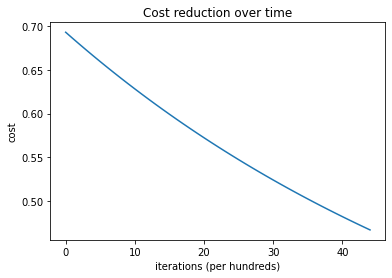

In [64]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
clf = LogisticRegression()

In [67]:
clf.fit(X_tr_arr, y_tr_arr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
print (clf.intercept_, clf.coef_)

[-0.55607279] [[-0.69791666  1.16455265 -1.40231641 -1.47095115]]


In [69]:
pred = clf.predict(X_ts_arr)

In [70]:
print ('Accuracy from sk-learn: {0}'.format(clf.score(X_ts_arr, y_ts_arr)))

Accuracy from sk-learn: 1.0
